### Statistical Testing
1. We will conduct pre- and post legalization comparison to determine if there is a difference in metrics following a weed intervention.
2. We choose paired t-test as it's best suited to compare the means of the two samples of related data.
3. Our null-hypothesis assumes that the true mean difference between the paired samples is zero which means any difference between pre- and post metrics is due to random variation.
4. Our alternative hypothesis assumes that the true mean difference between the paired samples is not equal to zero and is due to herb leaglization.

In [1]:
#Importing dependencies 

import os
import sqlite3
import re
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from scipy import stats

plt.style.use('ggplot')
%matplotlib inline

In [2]:
legalization = [{"state" : "Alaska", "year": 2014}, {"state" : "California", "year": 2016},
                {"state":"Colorado", "year" : 2012}, {"state": "Maine", "year" : 2016}, 
                {"state":"Massachusetts", "year":2016}, {"state":"Nevada", "year":2016}, 
                {"state":"Oregon", "year": 2014}, {"state" : "Vermont", "year": 2018}, 
                {"state" :"Washington", "year":2012}, {"state":"Washington D.C.","year": 2015}]


In [3]:
weed_df = pd.read_excel("/Users/daryarudych/Desktop/repos/Project2_Group1/db/weed_df.xlsx")
weed_df

,State,Year,Quarter,Value
0,Alaska,2010,1,708451
1,Alaska,2010,2,712138
2,Alaska,2010,3,715138
3,Alaska,2010,4,717270
4,Alaska,2011,1,719235
5,Alaska,2011,2,721207
6,Alaska,2011,3,723403
7,Alaska,2011,4,725607
8,Alaska,2012,1,727693
9,Alaska,2012,2,729748


In [4]:
#Calculating average population pre and post weed legalization

pre_avg = []
post_avg = []
states = []
for li in legalization:
    states.append(li["state"])
    pre_weed_avg = weed_df.loc[(weed_df["State"] == str(li["state"])) & (weed_df["Year"] < li["year"]), "Value"].mean()
    post_weed_avg = weed_df.loc[(weed_df["State"] == str(li["state"])) & (weed_df["Year"] >= li["year"]), "Value"].mean()
    pre_avg.append(pre_weed_avg)
    post_avg.append(post_weed_avg)

pop_avg = list(zip(states, pre_avg, post_avg))
pop_avg


pop_df = pd.DataFrame(pop_avg, columns=['State','Pre_Avg', 'Post_Avg'])
pop_df

,State,Pre_Avg,Post_Avg
0,Alaska,7.255792e+05,7.389941e+05
1,California,3.818956e+07,3.947913e+07
2,Colorado,5.082540e+06,5.416391e+06
3,Maine,1.328348e+06,1.334776e+06
4,Massachusetts,6.683550e+06,6.851559e+06
5,Nevada,2.780551e+06,2.983964e+06
6,Oregon,3.880205e+06,4.067419e+06
7,Vermont,6.251717e+05,6.238845e+05
8,Washington,6.781260e+06,7.154425e+06
9,Washington D.C.,6.344655e+05,6.861919e+05


In [5]:
pop_df[['Pre_Avg', 'Post_Avg']].describe()

,Pre_Avg,Post_Avg
count,1.000000e+01,1.000000e+01
mean,6.671123e+06,6.933674e+06
std,1.133217e+07,1.170919e+07
min,6.251717e+05,6.238845e+05
25%,8.762715e+05,8.879395e+05
50%,3.330378e+06,3.525691e+06
75%,6.283297e+06,6.492767e+06
max,3.818956e+07,3.947913e+07


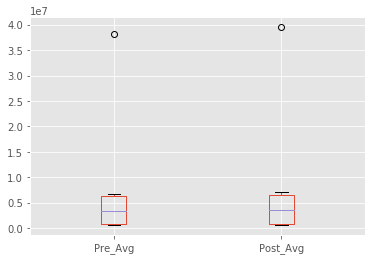

In [6]:
pop_df[['Pre_Avg', 'Post_Avg']].plot(kind='box')
# This saves the plot as a png file
plt.savefig('boxplot_outliers.png')

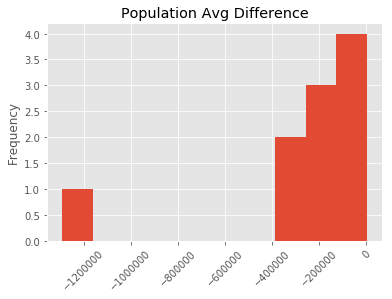

In [7]:
pop_df['pop_difference'] = pop_df['Pre_Avg'] - pop_df['Post_Avg']

pop_df['pop_difference'].plot(kind='hist', title= 'Population Avg Difference', rot=45)
#Again, this saves the plot as a png file
plt.savefig('Population Avg Difference.png')

#### The histogram of our data doesn't seen to be normally distributed. Another way to check for normally distributed data is to use a Q-Q plot. The data should be on the red line. If it’s not, then it suggests that the data may not be normally distributed.


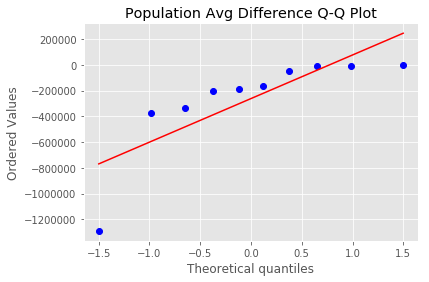

In [8]:
stats.probplot(pop_df['pop_difference'], plot= plt)
plt.title('Population Avg Difference Q-Q Plot')
plt.savefig('Population Avg Difference Q-Q plot.png')

#### There is some deviation from normality, but it does not appear to be severe. To be sure, let’s test this statistically to see if the data is normally distributed. To test this, we can use the Shapiro-Wilk test for normality. 

In [13]:
stats.shapiro(pop_df['pop_difference'])

(0.6766060590744019, 0.0004591512551996857)

### The p-value is under 0.05 and we can assume that the test was significant and the data is not normally distributed. Therefore, an appropriate alternative to use would be the Wilcoxon signed-rank Test.

## Wilcoxon signed-rank Test

In [14]:
stats.wilcoxon(pop_df['Pre_Avg'], pop_df['Post_Avg'])

WilcoxonResult(statistic=1.0, pvalue=0.0069104298078147995)

## Conclusion: 
Since the p-value is greater than 0.05 we reject the null-hypothesis and accept alternative hypothesis, that is the true location shift is greater than 0 and might be due to herb leaglization.